#### A Solution to Supply &amp; Demand with Equilibrium and Surplus in Python

Chuck Becker (becker@sonoma.edu), for ECON 381, Sonoma State University, Fall 2019

#### __Version 0.1__  
(Several code and notation bugs fixed. Beta for testing, if you are interested.)

#### To Do:  
1) fix the "CS" and "PS" labels to locate them properly on the graph  
2) add a routine for per unit tax/subsidy  
3) add a routine for deadweight loss  
4) Shade the areas of CS, PS, tax/subsidy, and DWL

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Class definition below, based on:

Pd = a - bQd

Ps = c + dQs

This assumes &amp; depends on the demand function having a negative coefficient (b),
and the supply function having a positive coefficient (d).

In [15]:
class Market:
    
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
                 
    def quantity(self):
        return ( (self.a - self.c) / (self.d - self.b) )     
                
    def price(self):
        return ( self.a + ( self.b * self.quantity() ) )
    
    def consumer_surplus(self):
        #  assumed to always be a right triangle....
        Pe = self.price()
        Qe = self.quantity()
        Yd = abs(self.a)
        return ( ( Yd - Pe ) * Qe * (1/2) )  
    
    def producer_surplus(self):
        # may be a right triangle or may be a quadrilateral
        # Y intercept Ys may be pos, zero, or neg
        Pe = self.price()
        Qe = self.quantity()
        
        Ys = -(self.c/self.d)
        
        ps = ( Pe - Ys ) * Qe * (1/2)
         
        if self.c > 0:
            return ( ps + ( (Ys * self.d) * (1/2) ) )
        else:
            return ps
           
    def demand_curve(self):
        return ( [ 0, abs(self.a/self.b) ], [ self.a, 0 ]  )
    
    def supply_curve(self):
        sc = []
        if c < 0:
            sc = [0, abs(self.c/self.d)]
        elif c == 0:
            sc = [0,0]
        else:
            sc = [0, self.c]
        return ( [ sc[0], abs(self.a/self.b) ], [ sc[1], (abs((self.a/self.b)*self.d))+self.c ] )
        
    

In [16]:
print("Using the form: Pd = a - bQd")
a = float( input("Enter demand constant (a) with sign: " ) )
b = float( input("Enter demand coefficient (b) with sign: " ) )
d_lab = input("Label for this function (eg; demand, MBf)?")
print("----------------------------")
print("Using the form Ps = c + dQs")
c = float( input("Enter supply constant (c) with sign: " ) )
d = float( input("Enter supply coefficient (d) with sign: " ) )
s_lab = input("Label for this function (eg; supply, MCc)? ")

x_lab = input("Label for the x-axis (eg; Quantity): ")
y_lab = input("Label for the y-axis (eg; Price, MB/MC): ")


if a < c:
    raise ValueError('Insufficient demand!')
if b >= 0:
    raise ValueError('Demand coefficient must be negative ... the whole world depends on it!')
if d <= 0:
    raise ValueError('Oh, my goodness, the supply coefficient must be positive!')

m = Market(a, b, c, d)

# Market methods and assign to unit global variables
cs = m.consumer_surplus()
ps = m.producer_surplus()
dc = m.demand_curve()
sc = m.supply_curve()
ep = m.price()
eq = m.quantity()

Using the form: Pd = a - bQd
Enter demand constant (a) with sign: 500
Enter demand coefficient (b) with sign: -5
Label for this function (eg; demand, MBf)?MB
----------------------------
Using the form Ps = c + dQs
Enter supply constant (c) with sign: 0
Enter supply coefficient (d) with sign: 3.333333
Label for this function (eg; supply, MCc)? MC
Label for the x-axis (eg; Quantity): Quantity
Label for the y-axis (eg; Price, MB/MC): MB/MC


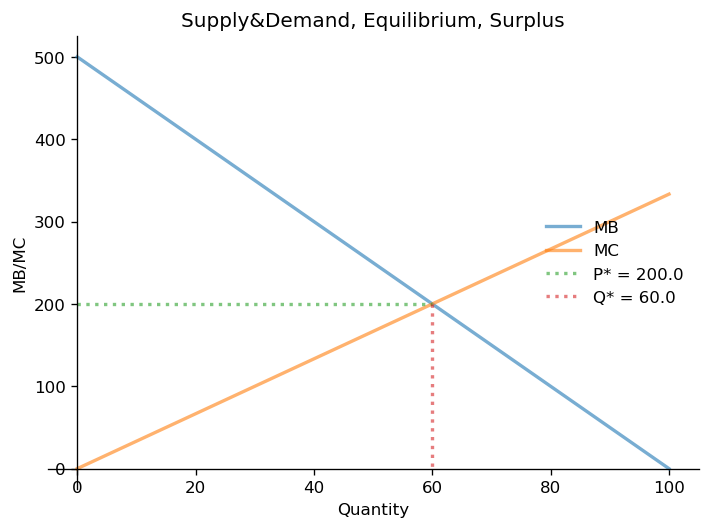

Demand function: Pd = 500.0 - 5.0Qd
Supply function: Ps = 0.0 + 3.333333Qs
Equilibrium Price =  200.0
Equilibrium Quantity =  60.0
Consumer Surplus = 9000.0
Producer Surplus = 6000.0
Total Surplus = 15000.0


In [17]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)
ax = plt.gca()  # gca stands for 'get current axis', this was copied & pasted, no idea what it does....
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(dc[0], dc[1], linewidth=2, label=d_lab, alpha=0.6 )
ax.plot(sc[0], sc[1], linewidth=2, label=s_lab, alpha=0.6 )
plabel = "P* = " + str(round(ep,2))
qlabel = "Q* = " + str(round(eq,2))
ax.plot([0, eq], [ep, ep], linewidth=2, label=(plabel), alpha=0.6, linestyle=':')
ax.plot([eq, eq], [ep, 0], linewidth=2, label=(qlabel), alpha=0.6, linestyle=':')
plt.xlabel(x_lab)
plt.ylabel(y_lab)
ax.legend(loc='center right', frameon=False)
ax.set_title('Supply&Demand, Equilibrium, Surplus')
# ax.annotate("CS", (eq/5, ep+.5))
# ax.annotate("PS", (eq/5, ep-1.3))
plt.show()

print("Demand function: Pd = " + str(a) + " - " + str(abs(b))+"Qd")
print("Supply function: Ps = " + str(c) + " + " + str(d)+"Qs")
print("Equilibrium Price = ", str(round(ep,2)))
print("Equilibrium Quantity = ", str(round(eq,2)))
print('Consumer Surplus =', str(round(cs,2)))
print('Producer Surplus =', str(round(ps,2)))
print('Total Surplus =', str(round(cs+ps,2)))